<a href="https://colab.research.google.com/github/elirazshomron/Agtech_project/blob/main/final_project_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**
The project is based on the material taught in the machine learning course (76691) of the Hebrew University. The database is observations of abiotic characteristics collected throughout Israel. During the project we will use clustering methods to characterize different habitats in Israel. After that we will try to adjust distribution maps for a variety of species with the help of classification methods.



##import pakcages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/faculty/year_3/machine_learning/data500m.csv')

##summarise and cleaning the data

In [ ]:
df.head(2)

,X,Y,rain,aspect,dem,dist2sea,mdT1,mdT_8,maxTjune,minTjan,slope,soil,ecosystem,land_use,lithology
0,126050,581850,253.938004,321.253143,8.912500,282.842712,12.281427,24.270668,24.021530,3.760565,0.552109,8,255,0,4
1,126050,581350,251.983093,263.629669,7.718203,640.312439,12.281427,24.215633,27.918148,3.745274,2.182212,8,255,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115596 entries, 0 to 115595
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   X          115596 non-null  int64  
 1   Y          115596 non-null  int64  
 2   rain       115596 non-null  float64
 3   aspect     110065 non-null  float64
 4   dem        115556 non-null  float64
 5   dist2sea   115564 non-null  float64
 6   mdT1       115577 non-null  float64
 7   mdT_8      115564 non-null  float64
 8   maxTjune   115564 non-null  float64
 9   minTjan    115564 non-null  float64
 10  slope      115556 non-null  float64
 11  soil       115596 non-null  int64  
 12  ecosystem  115596 non-null  int64  
 13  land_use   115596 non-null  int64  
 14  lithology  115596 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 13.2 MB


In [ ]:
#add the slope feature
slope_ranges = [0, 5, 15, 30, float('inf')]
slope_categories = [1, 2, 3, 4]
df['slope_category'] = pd.cut(df['slope'], bins=slope_ranges, labels=slope_categories, include_lowest=True)


In [ ]:
data=df #for futere use
data=data[['X','Y','rain', 'aspect', 'dem', 'mdT_8', 'slope_category']]

In [ ]:
#cleaning the nan values
df=df.dropna()
df = df[df['lithology'] != 255]
df = df[df['ecosystem'] != 255]


seems we remain with enough data, so we can remove the rows with nan value

We ran it at first to get a general sense of the possible connections and distributions. The run takes a long time, it is not necessary to run every time

In [ ]:
#sns.pairplot(df,corner=True)

It can be seen that the north-south axis affects many climate features. For example, the more northerly a point is, the higher the precipitation level, but the lower the temperature (minimum and maximum).
let's see all the corraletion at once:

<ipython-input-46-c17dc8de5ff9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

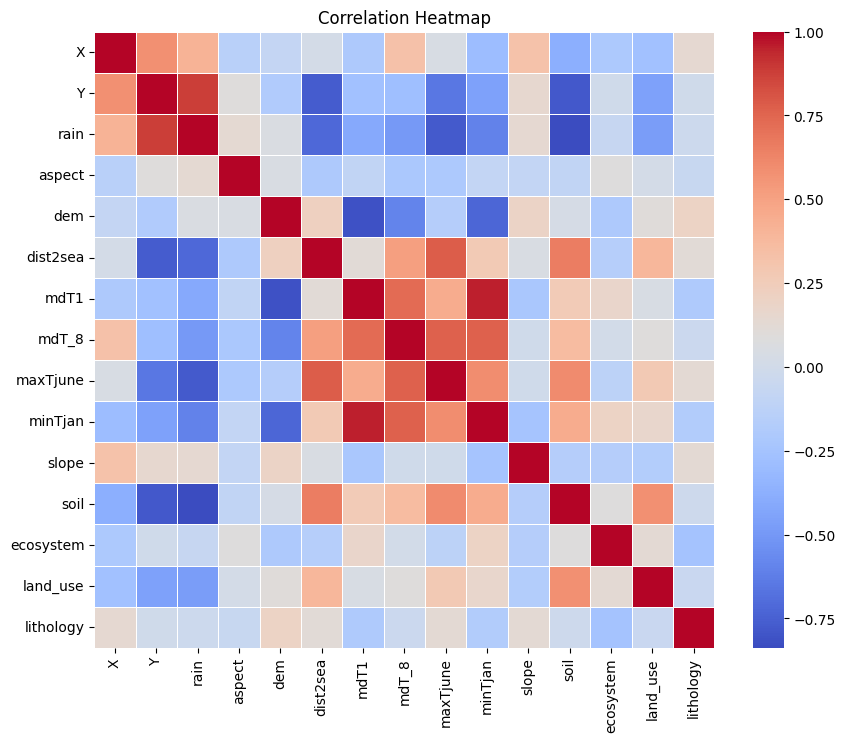

In [ ]:
#heat map
corr_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,  cmap='coolwarm', linewidths=0.5)
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')




---

#PART 1: CLUSTRING

##clustring without PCA

After many attempts it seems that these are the appropriate features. For example the longitude line had too much influence and was therefore removed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='X', ylabel='Y'>

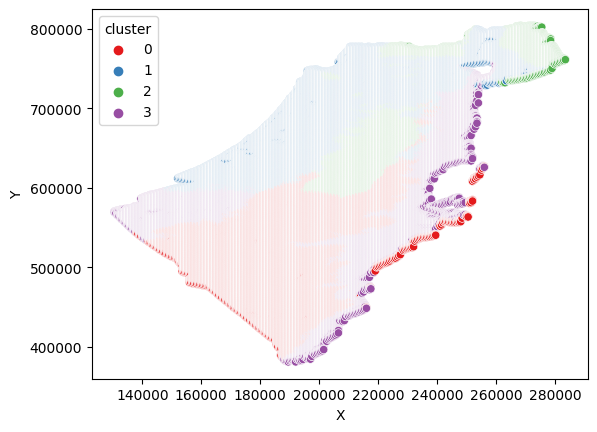

In [ ]:
from sklearn.cluster import KMeans

features = ['rain', 'aspect', 'dem', 'mdT_8', 'slope_category']

# Extract the feature values from the DataFrame
X = df[features]

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=4)  # soon we will see by elbow method 4 clusters make sense
# Fit the algorithm to the normalized data
kmeans.fit(X)

# Retrieve the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = labels
sns.scatterplot(data=df, x='X', y='Y', hue='cluster',palette='Set1')#, palette=custom_palette)

##Normalized vs. Unnormalized

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


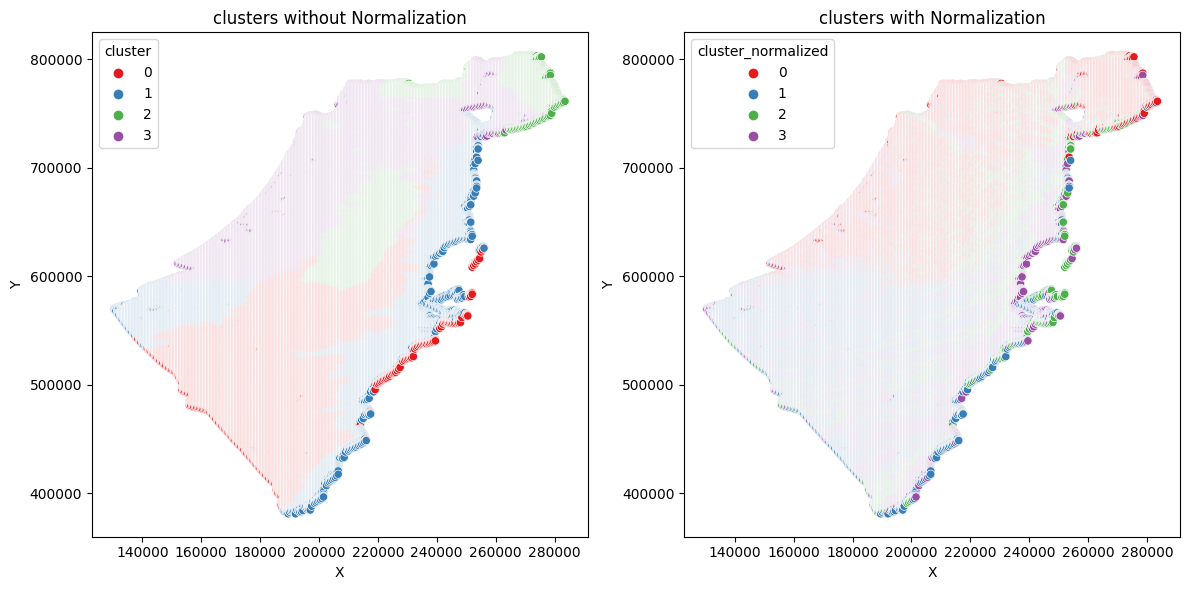

In [ ]:
# Select the features for clustering
features = ['rain', 'aspect', 'dem', 'mdT_8', 'slope_category']

# Extract the feature values from the DataFrame
X = df[features]

# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=4)  # soon we will see by elbow method 4 clusters make sense

# Fit the algorithm to the data without normalization
kmeans.fit(X)

# Retrieve the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = labels

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Fit the algorithm to the normalized data
kmeans.fit(X_normalized)

# Retrieve the cluster labels for normalized data
labels_normalized = kmeans.labels_

# Add the cluster labels for normalized data to the DataFrame
df['cluster_normalized'] = labels_normalized

# Plot both scatterplots on a single figure
plt.figure(figsize=(12, 6))

# Scatterplot without normalization
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='X', y='Y', hue='cluster', palette='Set1')
plt.title('clusters without Normalization')

# Scatterplot with normalization
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='X', y='Y', hue='cluster_normalized', palette='Set1')
plt.title('clusters with Normalization')

plt.tight_layout()


In this case it seems that without normalization the map describes the different regions of Israel well. The coastal plain, the mountain, the Negev and the more wooded areas

##compairing to RATAG

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


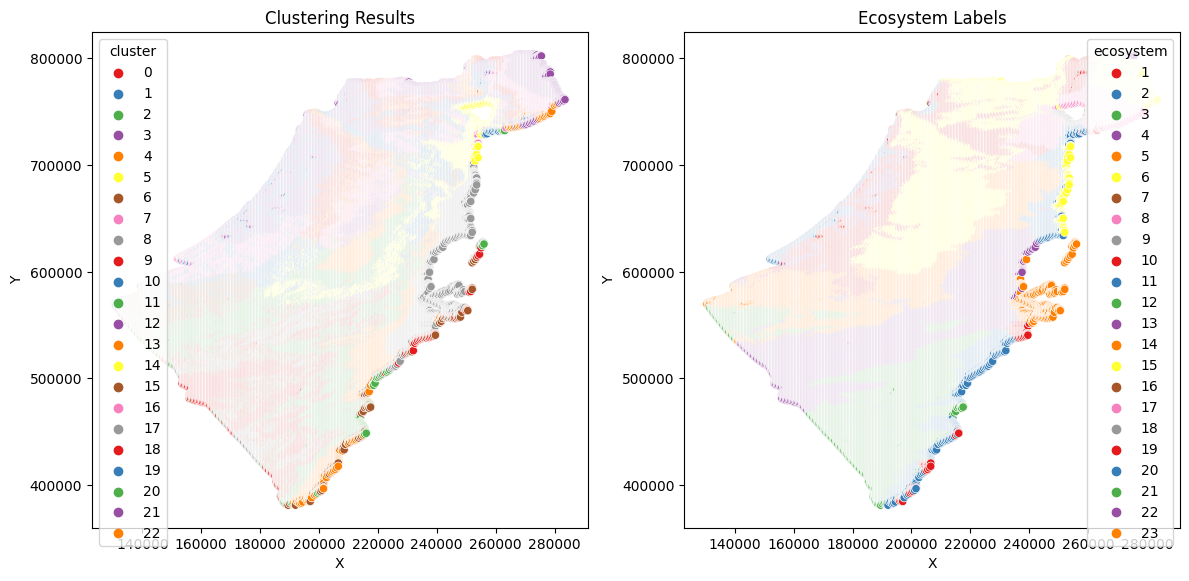

In [ ]:
# Select the features for clustering
features = ['rain', 'aspect', 'dem', 'mdT_8', 'slope_category']

# Extract the feature values from the DataFrame
X = df[features]
# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=23)  # Replace with the desired number of clusters

# Fit the algorithm to the normalized data
kmeans.fit(X)

# Retrieve the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = labels

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatterplot for cluster labels
sns.scatterplot(data=df, x='X', y='Y', hue='cluster',palette='Set1', ax=axes[0])
axes[0].set_title('Clustering Results')

# Scatterplot for ecosystem labels
sns.scatterplot(data=df, x='X', y='Y', hue='ecosystem',palette='Set1', ax=axes[1])
axes[1].set_title('Ecosystem Labels')

# Adjust the spacing between subplots
plt.tight_layout()


##the best number of clusters

based on elbow method to choose the number of clusters. probably the silhouette providers another solution but my computer got stuck once I try calculate more than several iterate.

In [ ]:
from sklearn.metrics import silhouette_score

#silhouette_score(X_normalized, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Method')

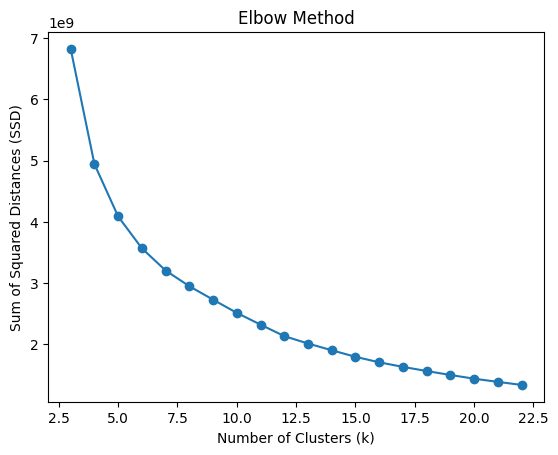

In [ ]:

# Define the range of clusters to test
k_values = range(3, 23)

# Calculate the sum of squared distances (SSD) for each value of k
ssd_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd_values.append(kmeans.inertia_)

# Plot the SSD values against the number of clusters (k)
plt.plot(k_values, ssd_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method')


seems 4 clusters fit for our case acording elbow. calculate by silhouette_score take long time

## Applay PCA on the data (suposse to take time to run)

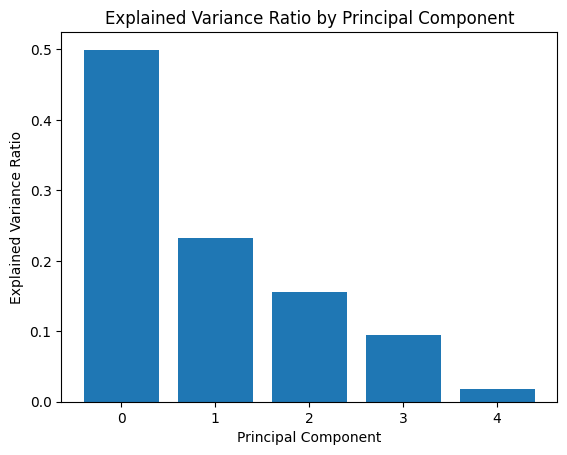

Most Important Features:
aspect
rain
mdT_8
slope_category
dem


In [ ]:
# Retrieve the cluster labels
labels = kmeans.labels_

# Apply PCA to the feature matrix
pca = PCA()
X_pca = pca.fit_transform(X_normalized)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Get the indices of the most important features based on the loadings in the first principal component
most_important_feature_indices = np.argsort(np.abs(pca.components_[0]))[::-1]

# Get the names of the most important features
most_important_features = [features[i] for i in most_important_feature_indices]

# Print the most important features
print("Most Important Features:")
for feature in most_important_features:
    print(feature)


actually, we can use just 4 main components to explain the main part of the variation. now we can fit the cluster model by using the 4 prenciples components:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


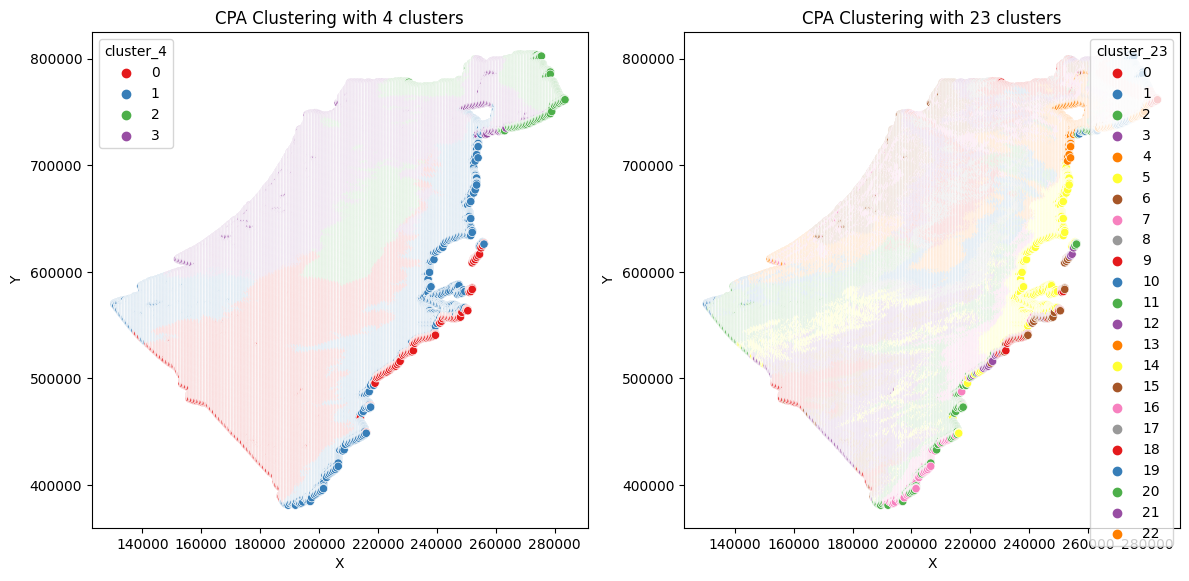

In [ ]:
# Define the features for clustering
features = ['rain', 'aspect', 'slope_category', 'mdT_8','dem']

# Extract the feature values from the DataFrame
X = df[features]

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Instantiate the K-means clustering algorithm for 4 clusters
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(X_pca)
labels_4 = kmeans_4.labels_

# Add the 4-cluster labels to the DataFrame
df['cluster_4'] = labels_4

# Instantiate the K-means clustering algorithm for 23 clusters
kmeans_23 = KMeans(n_clusters=23)
kmeans_23.fit(X_pca)
labels_23 = kmeans_23.labels_

# Add the 23-cluster labels to the DataFrame
df['cluster_23'] = labels_23

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for 4 clusters
sns.scatterplot(data=df, x='X', y='Y', hue='cluster_4',palette='Set1', ax=axes[0])
axes[0].set_title('CPA Clustering with 4 clusters')

# Plot for 23 clusters
sns.scatterplot(data=df, x='X', y='Y', hue='cluster_23',palette='Set1', ax=axes[1])
axes[1].set_title('CPA Clustering with 23 clusters')

# Adjust the spacing between subplots
plt.tight_layout()


It seems that using PCA we also got good results. Especially for the division into 4 clusters, you can see clear and distinct areas on the map. now let's see hwo much clusres according elbow method:


In [ ]:
#silhouette_score(X_pca, labels)#my computer  stuck again by calc with silhouette

In [ ]:
from sklearn.metrics import silhouette_score

# Select the features for clustering
features = ['rain', 'aspect', 'slope_category', 'mdT_8']

# Extract the feature values from the DataFrame
X = df[features]

# Define the range of clusters to test
k_values = range(3, 20)

# Initialize lists to store the evaluation scores
silhouette_scores = []
ssd_values = []

# Iterate over different numbers of clusters
for k in k_values:
    # Instantiate the K-means clustering algorithm
    kmeans = KMeans(n_clusters=k)

    # Fit the algorithm to the data
    kmeans.fit(X_pca)

    # Retrieve the cluster labels
    labels = kmeans.labels_
    # Calculate the sum of squared distances (SSD)
    ssd_values.append(kmeans.inertia_)
# Plot the SSD values
plt.plot(k_values, ssd_values, marker='o')
plt.xlabel('Number of Clusters (k) for PCA')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method')


again we are finding that 4 clusters are reducing the main part of SSD

##important of features

To understand which features have a significant contribution, we used PCA, according to this we will see their distribution

<ipython-input-56-b62a34304fd5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i])
<ipython-input-56-b62a34304fd5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i])
<ipython-input-56-b62a34304fd5>:9: UserWarning: 

`distplot` is a deprecated functio

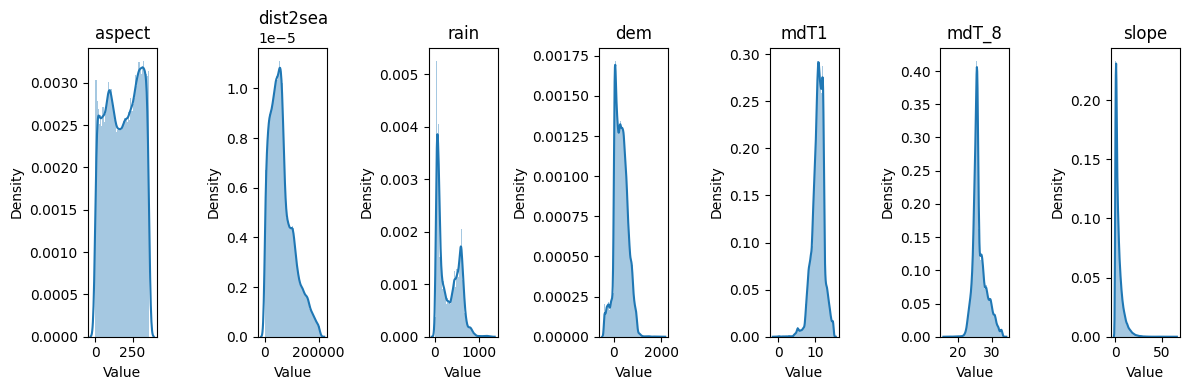

In [ ]:
# Select the features for plotting
features = ['aspect', 'dist2sea', 'rain', 'dem', 'mdT1', 'mdT_8', 'slope']

# Create subplots for the distributions
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(12, 4))

# Plot the distributions for each feature
for i, feature in enumerate(features):
    sns.distplot(df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Adjust the spacing between subplots
plt.tight_layout()

It can be seen that features such as rain and aspect are not normally distributed, which means that there is variation between the different places. From here it can be understood that these features will be good to characterize different habitats.



---



## allocating species to clusters

In [ ]:
alon_tavor=pd.read_csv('/content/drive/MyDrive/faculty/year_3/machine_learning/occurrences.csv')
alon_commun=pd.read_csv('/content/drive/MyDrive/faculty/year_3/machine_learning/alon_commun.csv')
paamonit_jerusalem=pd.read_csv('/content/drive/MyDrive/faculty/year_3/machine_learning/paamonit.csv')
snonit_holot=pd.read_csv('/content/drive/MyDrive/faculty/year_3/machine_learning/snonit_holot.csv')

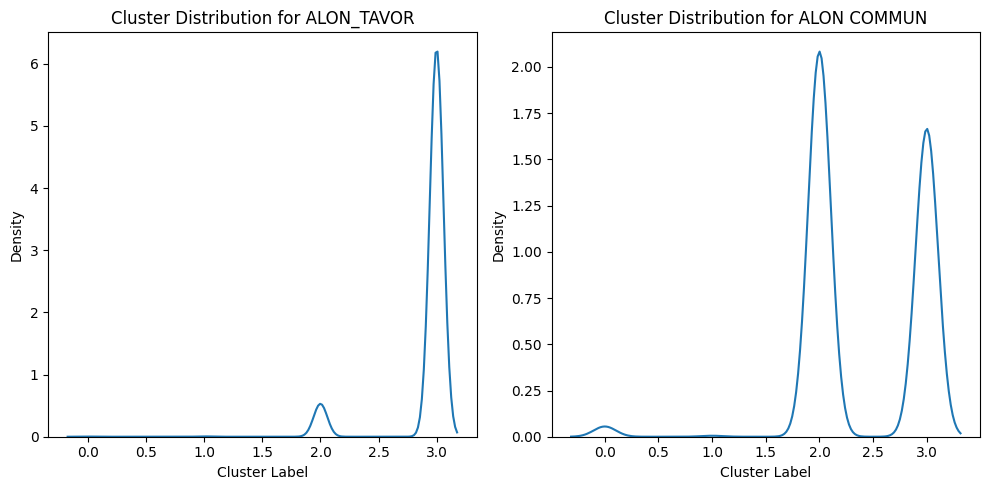

In [ ]:
def fit_species_to_cluster(species_df, species_name):
    # Extract the longitude and latitude values from both DataFrames
    species_coordinates = species_df[['x', 'y']].values
    df_coordinates = df[['X', 'Y']].values

    # Instantiate the NearestNeighbors algorithm
    nn = NearestNeighbors(n_neighbors=1)

    # Fit the algorithm with the coordinates from 'df'
    nn.fit(df_coordinates)

    # Find the nearest neighbor for each tree observation in 'alon_df'
    distances, indices = nn.kneighbors(species_coordinates)

    # Retrieve the corresponding cluster labels from 'df'
    species_df['cluster'] = df['cluster_4'].values[indices]

    # Return the cluster labels for the species
    return species_df['cluster']

species_lst = [alon_tavor, alon_commun]
species_names = ['ALON_TAVOR', 'ALON COMMUN']

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Iterate over each species and plot the distribution of cluster labels
for idx, (species, species_name) in enumerate(zip(species_lst, species_names)):
    # Get the corresponding subplot
    ax = axes[idx]

    # Retrieve the cluster labels for the species
    cluster_labels = fit_species_to_cluster(species, species_name)

    # Plot the distribution of cluster labels
    sns.kdeplot(data=cluster_labels, ax=ax)
    ax.set_title('Cluster Distribution for ' + species_name)
    ax.set_xlabel('Cluster Label')
    ax.set_ylabel('Density')

# Adjust spacing between subplots
plt.tight_layout()


the result make sense, most of this species belongs to a specifiec clusters. while 'Alon Tavar' concrented in one cluster, 'Alon commun' has high plasticity and lives in two clusters.

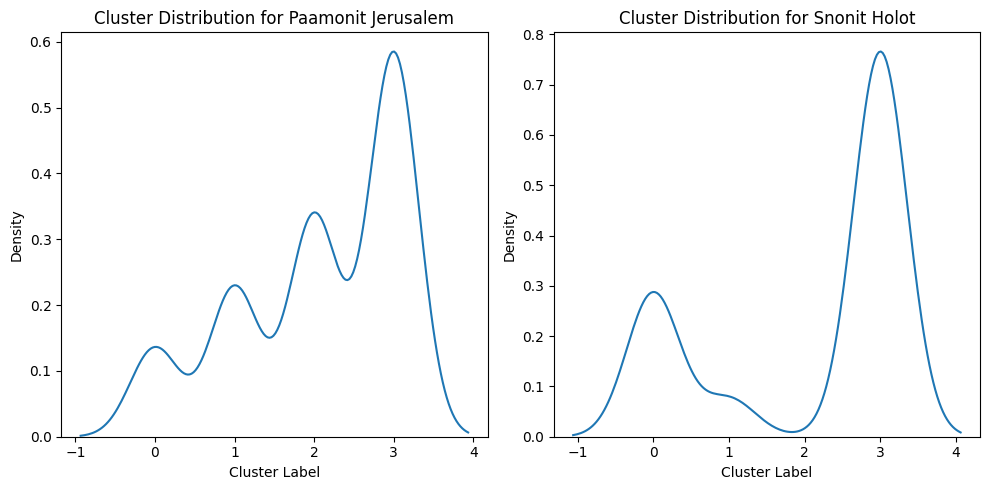

In [ ]:
species_lst = [paamonit_jerusalem, snonit_holot]
species_names = ['Paamonit Jerusalem', 'Snonit Holot']

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Iterate over each species and plot the distribution of cluster labels
for idx, (species, species_name) in enumerate(zip(species_lst, species_names)):
    # Get the corresponding subplot
    ax = axes[idx]

    # Retrieve the cluster labels for the species
    cluster_labels = fit_species_to_cluster(species, species_name)

    # Plot the distribution of cluster labels
    sns.kdeplot(data=cluster_labels, ax=ax)
    ax.set_title('Cluster Distribution for ' + species_name)
    ax.set_xlabel('Cluster Label')
    ax.set_ylabel('Density')

# Adjust spacing between subplots
plt.tight_layout()

There are species we couldn't put at a single main cluster. maybe because they are fits to diversity habitats. It's may explain the result of 'Paamonit Jerusalem'.



---

#part 2: distribution maps



---



##Aplicate the model on the data500

by using the **'pseudo-absence'** method

Fanction 1: maping by logistic regration

In [ ]:

from scipy.spatial import cKDTree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

def add_presence_absence_column(new_df, data):
    # Create KDTree from the 'data' DataFrame coordinates (X, Y)
    tree = cKDTree(data[['X', 'Y']])

    # Find nearest points in 'data' for each (x, y) in 'new_df'
    distances, indices = tree.query(new_df[['x', 'y']], k=1)

    # Add 'XCLOSE' and 'YCLOSE' columns to 'new_df'
    new_df['x_near'] = data.loc[indices, 'X'].values
    new_df['y_near'] = data.loc[indices, 'Y'].values

    # Create a set of (XCLOSE, YCLOSE) coordinates from 'new_df'
    new_coords = set(zip(new_df['x_near'], new_df['y_near']))

    # Check if each (X, Y) coordinate in 'data' is present in 'new_coords'
    data['presence/absence'] = np.where(
        data[['X', 'Y']].apply(lambda row: (row['X'], row['Y']) in new_coords, axis=1),
        '1',
        ''
    ) # 1-->presence, 0--->absence

    return data

def generate_model_data(new_df, data):
    # Add presence/absence column to 'data'
    data = add_presence_absence_column(new_df, data)

    # Filter 'data' to select rows where 'presence/absence' is not equal to '1'
    non_presence_data = data[data['presence/absence'] != '1']
    non_presence_data['presence/absence'] = '0'

    # Select rows from 'data' where 'presence/absence' is equal to '1'
    presence_data = data[data['presence/absence'] == '1']

    # Randomly select rows from 'non_presence_data' to match the number of presence_data
    random_non_presence_data = non_presence_data.sample(n=len(presence_data), random_state=42)

    # Concatenate the randomly selected non-presence data and presence data
    model_data = pd.concat([random_non_presence_data, presence_data], ignore_index=True)

    # Convert 'presence/absence' column to a non-categorical type
    model_data['presence/absence'] = model_data['presence/absence'].astype(str)
    model_data = model_data.dropna()
    model_data.X=model_data.X/10000
    model_data.Y=model_data.Y/10000

    return model_data

def train_logistic_regression(model_data):
    x = model_data[['X', 'Y', 'rain', 'aspect', 'dem', 'mdT_8', 'slope_category']]
    y = model_data['presence/absence']

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_pred, y_test)
    accuracy = accuracy_score(y_pred, y_test)
    print('Confusion Matrix:\n', cm)
    print('Accuracy:', accuracy)

    return model

def predict_and_add_to_dataframe(model, data):
    data = data.drop('presence/absence', axis=1)
    data.X = data.X / 10000
    data.Y = data.Y / 10000
    data = data.dropna()

    y_pred = model.predict(data)

    data['presence/absence'] = y_pred

    return data

def plot_presence_absence_map(data, title):
    sns.scatterplot(data=data, x='X', y='Y', hue='presence/absence')
    plt.title(title)

def generate_presence_absence_map_LG(new_df, data,title):
    data = add_presence_absence_column(new_df, data)
    model_data = generate_model_data(new_df, data)
    model = train_logistic_regression(model_data)
    predicted_data = predict_and_add_to_dataframe(model, data)
    plot_presence_absence_map(predicted_data,title)


function 2: Maping by random forest model

In [ ]:

from sklearn.ensemble import RandomForestClassifier

def add_presence_absence_column(new_df, data):
    # Create KDTree from the 'data' DataFrame coordinates (X, Y)
    tree = cKDTree(data[['X', 'Y']])

    # Find nearest points in 'data' for each (x, y) in 'new_df'
    distances, indices = tree.query(new_df[['x', 'y']], k=1)

    # Add 'XCLOSE' and 'YCLOSE' columns to 'new_df'
    new_df['x_near'] = data.loc[indices, 'X'].values
    new_df['y_near'] = data.loc[indices, 'Y'].values

    # Create a set of (XCLOSE, YCLOSE) coordinates from 'new_df'
    new_coords = set(zip(new_df['x_near'], new_df['y_near']))

    # Check if each (X, Y) coordinate in 'data' is present in 'new_coords'
    data['presence/absence'] = np.where(
        data[['X', 'Y']].apply(lambda row: (row['X'], row['Y']) in new_coords, axis=1),
        '1',
        ''
    ) # 1-->presence, 0--->absence

    return data

def generate_model_data(new_df, data):
    # Add presence/absence column to 'data'
    data = add_presence_absence_column(new_df, data)

    # Filter 'data' to select rows where 'presence/absence' is not equal to '1'
    non_presence_data = data[data['presence/absence'] != '1']
    non_presence_data['presence/absence'] = '0'

    # Select rows from 'data' where 'presence/absence' is equal to '1'
    presence_data = data[data['presence/absence'] == '1']

    # Randomly select rows from 'non_presence_data' to match the number of presence_data
    random_non_presence_data = non_presence_data.sample(n=len(presence_data), random_state=42)

    # Concatenate the randomly selected non-presence data and presence data
    model_data = pd.concat([random_non_presence_data, presence_data], ignore_index=True)

    # Convert 'presence/absence' column to a non-categorical type
    model_data['presence/absence'] = model_data['presence/absence'].astype(str)
    model_data = model_data.dropna()
    model_data.X=model_data.X/10000
    model_data.Y=model_data.Y/10000

    return model_data

def train_random_forest(model_data):
    x = model_data[['X', 'Y', 'rain', 'aspect', 'dem', 'mdT_8', 'slope_category']]
    y = model_data['presence/absence']

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_pred, y_test)
    accuracy = accuracy_score(y_pred, y_test)
    print('Random Forest Model:')
    print('Confusion Matrix:\n', cm)
    print('Accuracy:', accuracy)

    return model

def predict_and_add_to_dataframe(model, data):
    data = data.drop('presence/absence', axis=1)
    data.X = data.X / 10000
    data.Y = data.Y / 10000
    data = data.dropna()

    y_pred = model.predict(data)

    data['presence/absence'] = y_pred

    return data

def plot_presence_absence_map(data, title):
    sns.scatterplot(data=data, x='X', y='Y', hue='presence/absence')
    plt.title(title)

def generate_presence_absence_map_RF(new_df, data,title):
    data = add_presence_absence_column(new_df, data)
    model_data = generate_model_data(new_df, data)
    model = train_logistic_regression(model_data)
    predicted_data = predict_and_add_to_dataframe(model, data)
    plot_presence_absence_map(predicted_data,title)


#presenting the model as distribution map of the species

##snonit_holot

<ipython-input-61-37cf27e43f30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


Confusion Matrix:
 [[49  8]
 [12 40]]
Accuracy: 0.8165137614678899


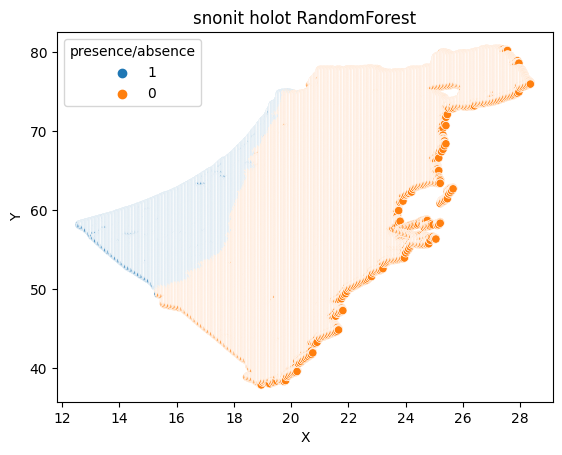

In [ ]:
generate_presence_absence_map_RF(snonit_holot, data,'snonit holot RandomForest')#maping by random forest


<ipython-input-61-37cf27e43f30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


Confusion Matrix:
 [[44 10]
 [12 43]]
Accuracy: 0.7981651376146789


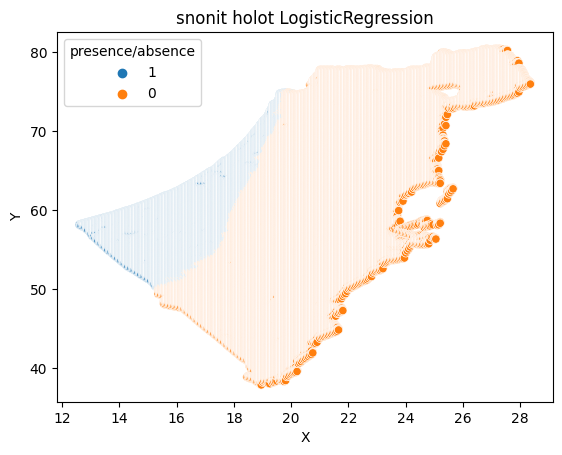

In [ ]:
generate_presence_absence_map_LG(snonit_holot, data,'snonit holot LogisticRegression')#maping by logisrit regration


Here we see that for 'Senonit Holot' the accuracy is so high even though the population size is small. I assume that this species is only suitable for specific habitats. Where there is no sand - it will not be there as you can clearly see on the maps.

##Alon commun

<ipython-input-61-37cf27e43f30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


Confusion Matrix:
 [[305  58]
 [121 370]]
Accuracy: 0.7903981264637002


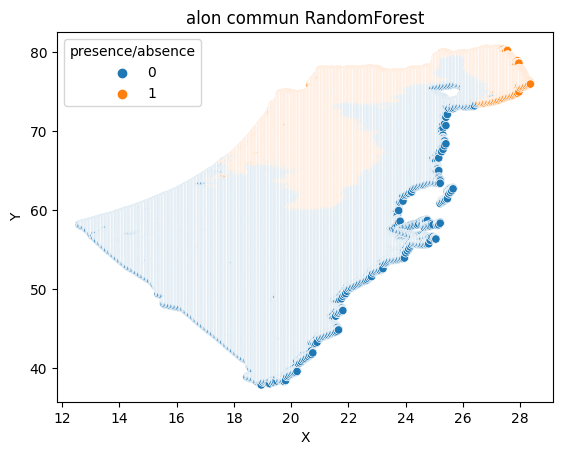

In [ ]:
generate_presence_absence_map_RF(alon_commun, data,'alon commun RandomForest')#maping by random forest


<ipython-input-61-37cf27e43f30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


Confusion Matrix:
 [[303  47]
 [101 403]]
Accuracy: 0.8266978922716628


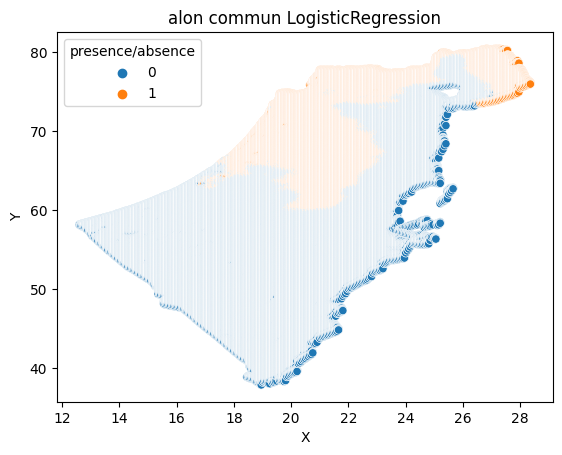

In [ ]:
generate_presence_absence_map_LG(alon_commun, data,'alon commun LogisticRegression')#maping by logisrit regration


I assume that since common oak is not unique to a certain habitat, the accuracy of the model may be low. However, since the sample size (in relation to the other species) is quite large, we obtained a reasonable level of accuracy (~0.8). but slightly higher in the random forest.

##Alon Tavor

<ipython-input-61-37cf27e43f30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


Confusion Matrix:
 [[149  12]
 [ 40 179]]
Accuracy: 0.8631578947368421


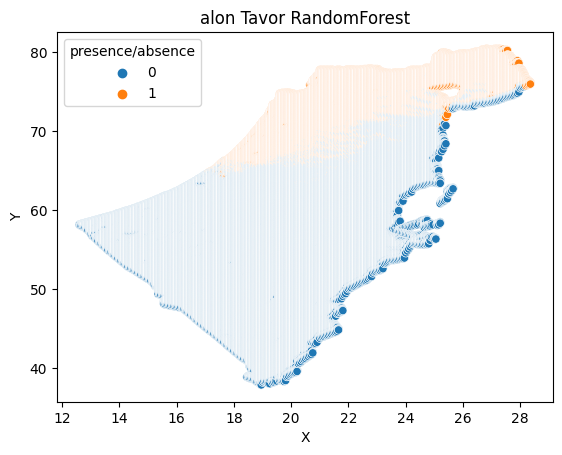

In [ ]:
generate_presence_absence_map_RF(alon_tavor, data,'alon Tavor RandomForest')#maping by random forest


<ipython-input-61-37cf27e43f30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[148   5]
 [ 48 179]]
Accuracy: 0.8605263157894737


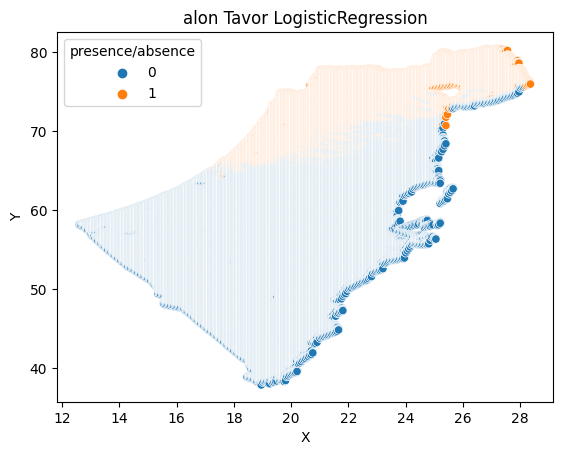

In [ ]:
generate_presence_absence_map_LG(alon_tavor, data,'alon Tavor LogisticRegression')#maping by logisrit regration


I thought the model miss something, but actually I found a pretty similar distribution map of 'Alon Tavor' in this website:
https://www.kalanit.org.il/quercus-ithaburensis/




##paamonit_jerusalem

<ipython-input-61-37cf27e43f30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


Confusion Matrix:
 [[37 20]
 [17 41]]
Accuracy: 0.6782608695652174


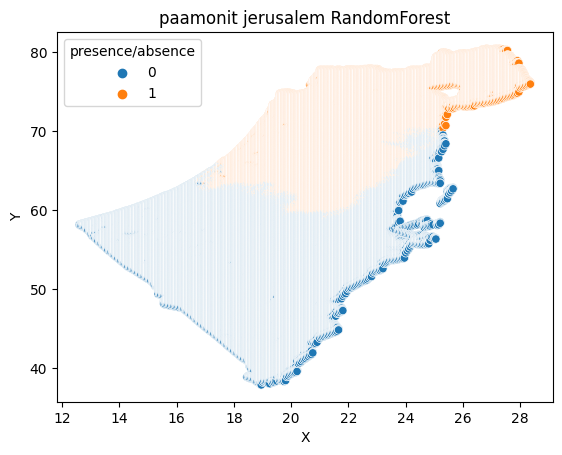

In [ ]:
generate_presence_absence_map_RF(paamonit_jerusalem, data,'paamonit jerusalem RandomForest')#maping by random forest


<ipython-input-61-37cf27e43f30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


Confusion Matrix:
 [[41 10]
 [16 48]]
Accuracy: 0.7739130434782608


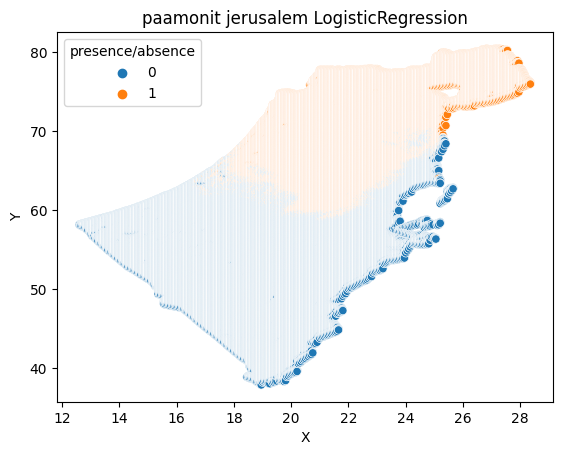

In [ ]:
generate_presence_absence_map_LG(paamonit_jerusalem, data,'paamonit jerusalem LogisticRegression')#maping by logisrit regration


in this case the accuricy prrety low. could be becuase of both, the population size small and the specie is not unique for jast a specific place (like snonit holot that require sand). despite the name called 'jerusalem', Paamonit grows in all centeral-north and north of Isreal as well as Sirya and Lebanon. https://www.kalanit.org.il/campanula_hierosolymitana_ssp-camptoclada/



---





---


# Bonus

##the function

here we modify the main function to present the ROC

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import cKDTree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.datasets import make_classification

def add_presence_absence_column(new_df, data):
    # Create KDTree from the 'data' DataFrame coordinates (X, Y)
    tree = cKDTree(data[['X', 'Y']])

    # Find nearest points in 'data' for each (x, y) in 'new_df'
    distances, indices = tree.query(new_df[['x', 'y']], k=1)

    # Add 'XCLOSE' and 'YCLOSE' columns to 'new_df'
    new_df['x_near'] = data.loc[indices, 'X'].values
    new_df['y_near'] = data.loc[indices, 'Y'].values

    # Create a set of (XCLOSE, YCLOSE) coordinates from 'new_df'
    new_coords = set(zip(new_df['x_near'], new_df['y_near']))

    # Check if each (X, Y) coordinate in 'data' is present in 'new_coords'
    data['presence/absence'] = np.where(
        data[['X', 'Y']].apply(lambda row: (row['X'], row['Y']) in new_coords, axis=1),
        '1',
        ''
    )  # 1-->presence, 0--->absence

    return data

def generate_model_data(new_df, data):
    # Add presence/absence column to 'data'
    data = add_presence_absence_column(new_df, data)

    # Filter 'data' to select rows where 'presence/absence' is not equal to '1'
    non_presence_data = data[data['presence/absence'] != '1']
    non_presence_data['presence/absence'] = '0'

    # Select rows from 'data' where 'presence/absence' is equal to '1'
    presence_data = data[data['presence/absence'] == '1']

    # Randomly select rows from 'non_presence_data' to match the number of presence_data
    random_non_presence_data = non_presence_data.sample(n=len(presence_data), random_state=42)

    # Concatenate the randomly selected non-presence data and presence data
    model_data = pd.concat([random_non_presence_data, presence_data], ignore_index=True)

    # Convert 'presence/absence' column to a non-categorical type
    model_data['presence/absence'] = model_data['presence/absence'].astype(str)
    model_data = model_data.dropna()
    model_data['X'] = model_data['X'] / 10000
    model_data['Y'] = model_data['Y'] / 10000

    return model_data

def train_logistic_regression(model_data):
    x = model_data[['X', 'Y', 'rain', 'aspect', 'dem', 'mdT_8', 'slope_category']]
    y = model_data['presence/absence'].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_pred_probs = model.predict_proba(X_test)[:, 1]
    global fpr
    global tpr
    # Compute the False Positive Rate (FPR), True Positive Rate (TPR), and classification thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Compute the Area Under the Curve (AUC)
    global auc_score
    auc_score = auc(fpr, tpr)
    cm = confusion_matrix(y_pred, y_test)
    accuracy = accuracy_score(y_pred, y_test)
    #print('Confusion Matrix:\n', cm)
    #print('Accuracy:', accuracy)

    return model

def predict_and_add_to_dataframe(model, data):
    data = data.drop('presence/absence', axis=1)
    data['X'] = data['X'] / 10000
    data['Y'] = data['Y'] / 10000
    data = data.dropna()

    y_pred = model.predict(data)

    data['presence/absence'] = y_pred

    return data

def plot_presence_absence_map(data, title):
    sns.scatterplot(data=data, x='X', y='Y', hue='presence/absence')
    plt.title(title)

def roc(fpr, tpr, auc_score,title):
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for a random classifier
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve for '+title)
    plt.legend()

def ROC_LG(new_df, data, title):
    data = add_presence_absence_column(new_df, data)
    model_data = generate_model_data(new_df, data)
    model = train_logistic_regression(model_data)
    predicted_data = predict_and_add_to_dataframe(model, data)
    #plot_presence_absence_map(predicted_data, title)
    roc(fpr, tpr, auc_score,title)

# Your data generation code

# Call the function to generate presence/absence map and ROC curve


##the caces:

<ipython-input-70-25be8730995d>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


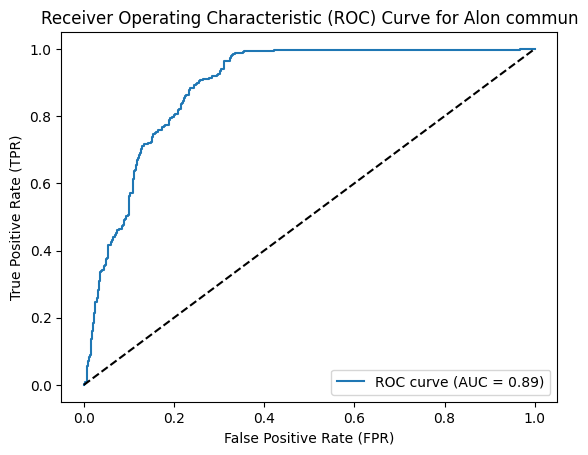

In [ ]:
ROC_LG(alon_commun, data, 'Alon commun')


<ipython-input-33-25be8730995d>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


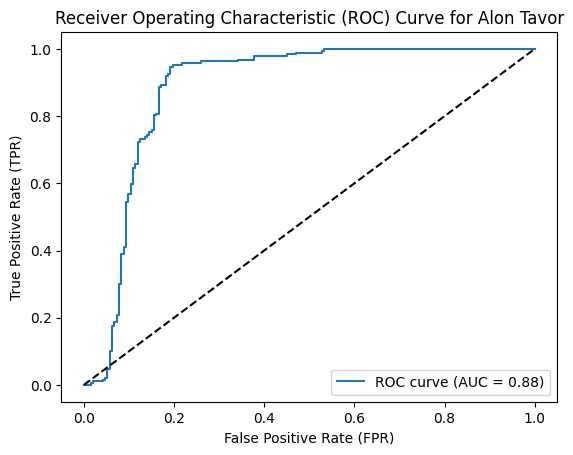

In [ ]:
ROC_LG(alon_tavor, data, 'Alon Tavor')


<ipython-input-33-25be8730995d>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


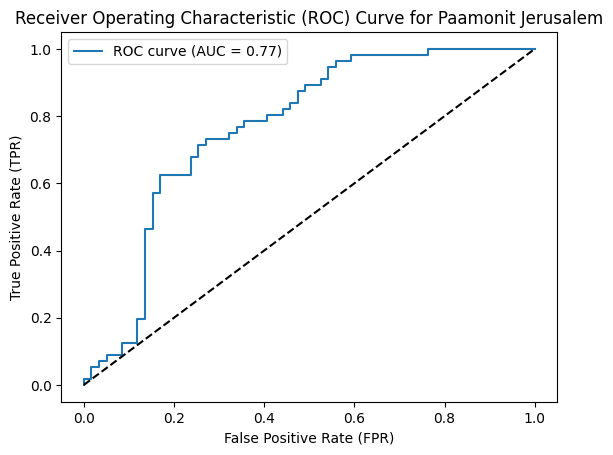

In [ ]:
ROC_LG(paamonit_jerusalem, data, 'Paamonit Jerusalem')


We see that ROC is low in this species compared to the other species. It is possible, as we wrote, since this species is not special to a specific habitat, the model we built describes it less well.

<ipython-input-33-25be8730995d>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_presence_data['presence/absence'] = '0'


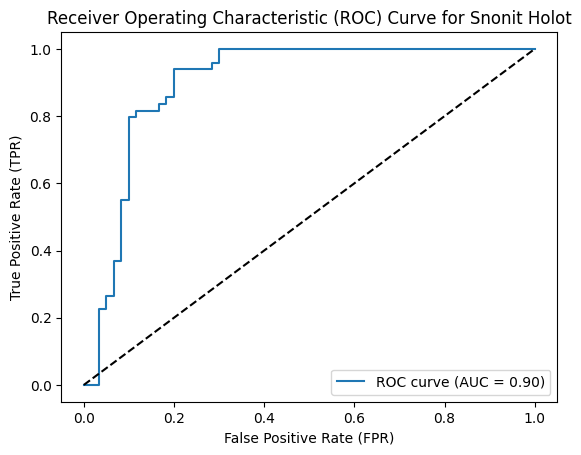

In [ ]:
ROC_LG(snonit_holot, data, 'Snonit Holot')
